In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from IPython.display import clear_output
import tensorflow as tf

from tensorflow.keras import Sequential,layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [2]:
base_path =  r"D:\welcome_to_machine_learning\level 3\cnn dataset\emotion dection"

  0%|          | 0/2 [00:00<?, ?it/s]

test :- ry | im0.png
test :- ry | im1.png
test :- ry | im10.png
test :- ry | im100.png
test :- ry | im101.png
test :- ry | im102.png
test :- ry | im103.png
test :- ry | im104.png
test :- ry | im105.png
test :- ry | im106.png
test :- gusted | im0.png
test :- gusted | im1.png
test :- gusted | im10.png
test :- gusted | im100.png
test :- gusted | im101.png
test :- gusted | im102.png
test :- gusted | im103.png
test :- gusted | im104.png
test :- gusted | im105.png
test :- gusted | im106.png
test :- rful | im0.png
test :- rful | im1.png
test :- rful | im10.png
test :- rful | im100.png
test :- rful | im1000.png
test :- rful | im1001.png
test :- rful | im1002.png
test :- rful | im1003.png
test :- rful | im1004.png
test :- rful | im1005.png
test :- py | im0.png
test :- py | im1.png
test :- py | im10.png
test :- py | im100.png
test :- py | im1000.png
test :- py | im1001.png
test :- py | im1002.png
test :- py | im1003.png
test :- py | im1004.png
test :- py | im1005.png
test :- tral | im0.png
test 

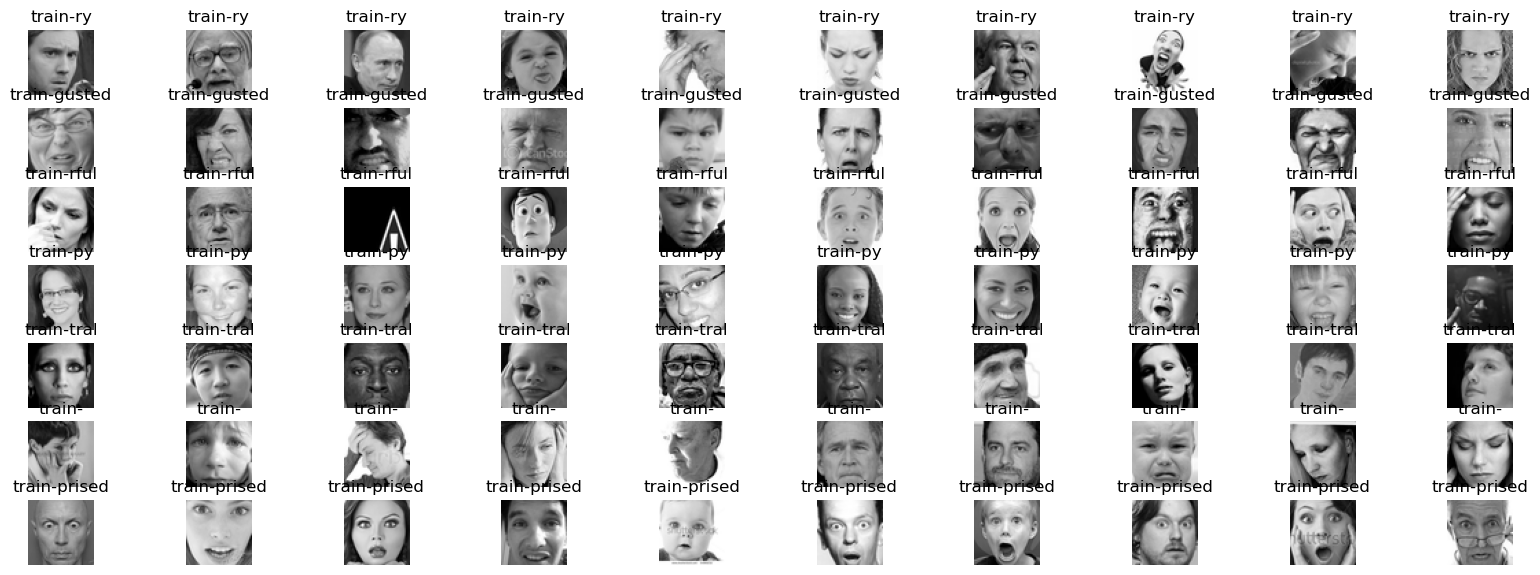

In [3]:
plt.figure(figsize=(20,10))

problematic_images=[]
image_to_show=10

for folders in tqdm(os.listdir(base_path)):

    all_folders=os.path.join(base_path,folders)

    for class_index,class_name in enumerate(os.listdir(all_folders)):

        for image_index,image_name in enumerate (os.listdir(os.path.join(all_folders,class_name))[:image_to_show],1):
            print(f"{folders} :- {class_name[3:]} | {image_name}")
            try:
                img_path=os.path.join(all_folders,class_name,image_name)
                img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                plt.subplot(10,10,(class_index*image_to_show)+image_index)
                plt.imshow(img_array)
                plt.title(f"{folders}-{class_name[3:]}")
                plt.axis("off")
            except Exception as e:
                print(e)
                problematic_image.append(img_path)
            pass
plt.show()

In [4]:
problematic_image=[]

images=[]
gesture_names=[]

image_to_show=-1

for folders in os.listdir(base_path):
    all_folders=os.path.join(base_path,folders)
    for class_index,class_name in enumerate(tqdm(os.listdir(all_folders),desc=f'subject : {folders}')):
        for image_index,image_name in enumerate (tqdm(os.listdir(os.path.join(all_folders,class_name))[:image_to_show],desc=f"class {class_name[3:]}"),1):
            try:
                img_path=os.path.join(all_folders,class_name,image_name)
                img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                resized_img=cv2.resize(img_array,(48,48))
                images.append(resized_img)
                gesture_names.append(class_name[3:])
            except Exception as e:
                print(e)
                problematic_image.append(img_path)
    clear_output(wait=True)

images = np.array(images)
gesture_names = np.array(gesture_names)

subject : train:   0%|          | 0/7 [00:00<?, ?it/s]

class ry:   0%|          | 0/3994 [00:00<?, ?it/s]

class gusted:   0%|          | 0/435 [00:00<?, ?it/s]

class rful:   0%|          | 0/4096 [00:00<?, ?it/s]

class py:   0%|          | 0/7214 [00:00<?, ?it/s]

class tral:   0%|          | 0/4964 [00:00<?, ?it/s]

class :   0%|          | 0/4829 [00:00<?, ?it/s]

class prised:   0%|          | 0/3170 [00:00<?, ?it/s]

In [5]:
print("Total Rows :",len(gesture_names))
pd.Series(gesture_names).value_counts()

Total Rows : 35873


py        8987
tral      6196
          6075
rful      5119
ry        4951
prised    4000
gusted     545
Name: count, dtype: int64

In [6]:
x_train_val, x_test, y_train_val, y_test = train_test_split(
    images, gesture_names, test_size=0.1, random_state=42, stratify=gesture_names
)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.1, random_state=42, stratify=y_train_val
)

print("X :", x_train.shape, x_val.shape, x_test.shape)
print("Y :", y_train.shape, y_val.shape, y_test.shape)

X : (29056, 48, 48, 3) (3229, 48, 48, 3) (3588, 48, 48, 3)
Y : (29056,) (3229,) (3588,)


In [7]:
label_model = OneHotEncoder(sparse_output=False)
y_train_one_hot = label_model.fit_transform(y_train.reshape(-1, 1))
y_val_one_hot = label_model.transform(y_val.reshape(-1, 1))
y_test_one_hot = label_model.transform(y_test.reshape(-1, 1))

In [8]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded   = le.transform(y_val)
y_test_encoded  = le.transform(y_test)

In [9]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight("balanced", classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weights = dict(enumerate(weights * 0.5))  # half-strength balancing
print("Class Weights:", class_weights)

Class Weights: {0: 0.4218350754936121, 1: 4.695539754363284, 2: 0.6405643738977073, 3: 0.28512550782093304, 4: 0.5005857625249811, 5: 0.5174341988104142, 6: 0.41359676592837213}


In [10]:
model = Sequential([
    layers.Input(shape=(48, 48, 3)),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.15),   # reduced dropout

    Conv2D(128, (5, 5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.15),   # reduced dropout

    Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.20),   # lighter than before

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.30),   # keep higher dropout in dense

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.30),
    Dense(7, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train_one_hot)).batch(32).shuffle(100).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

# -------------------------------
# Training
# -------------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    shuffle=True,
    class_weight=class_weights   # ✅ small balancing
)

Epoch 1/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 116s 123ms/step - accuracy: 0.1931 - loss: 1.4229 - val_accuracy: 0.3001 - val_loss: 1.9852
Epoch 2/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 116s 127ms/step - accuracy: 0.2615 - loss: 1.2157 - val_accuracy: 0.3465 - val_loss: 1.9010
Epoch 3/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 118s 129ms/step - accuracy: 0.3175 - loss: 1.1262 - val_accuracy: 0.3726 - val_loss: 1.8359
Epoch 4/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 118s 130ms/step - accuracy: 0.3728 - loss: 1.0168 - val_accuracy: 0.3515 - val_loss: 1.9187
Epoch 5/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 115s 127ms/step - accuracy: 0.4123 - loss: 0.9382 - val_accuracy: 0.4605 - val_loss: 1.6414
Epoch 6/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 114s 125ms/step - accuracy: 0.4547 - loss: 0.8710 - val_accuracy: 0.5135 - val_loss: 1.4605
Epoch 7/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 115s 126ms/step - accuracy: 0.4903 - loss: 0.8016 - val_accuracy: 0.4537 - val_loss: 1.8404
Epoch 8/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 114s 126ms/step - accuracy: 0.5186 -

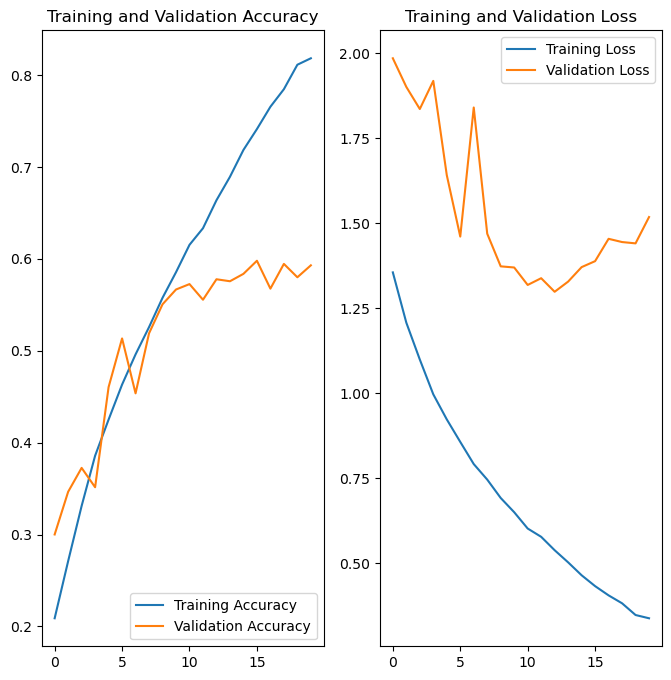

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Fit label encoder on integer labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train_encoded)
class_labels = [str(c) for c in label_encoder.classes_]  # <-- convert to strings

def evaluate(x, y_one_hot, y_true_encoded):
    pred = model.predict(x)
    predictions = np.argmax(pred, axis=1)
    accuracy = accuracy_score(y_true_encoded, predictions) * 100
    print(f'Accuracy: {round(accuracy, 2)} %')

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true_encoded, predictions))

    print("\nClassification Report:")
    print(classification_report(y_true_encoded, predictions, target_names=class_labels))

print("Train Performance:")
evaluate(x_train, y_train_one_hot, y_train_encoded)

print("Validation Performance:")
evaluate(x_val, y_val_one_hot, y_val_encoded)

print("Test Performance:")
evaluate(x_test, y_test_one_hot, y_test_encoded)


Train Performance:
908/908 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step
Accuracy: 93.2 %

Confusion Matrix:
[[4362   23    9   22   78   86  340]
 [   0  442    0    0    0    0    0]
 [   5    5 3202   10    6    3    9]
 [  76   23   59 6884   31   40  166]
 [ 130    9   91   15 3707   62  132]
 [  87   20    5   13   47 3694  145]
 [ 113   14    5   45   32   20 4789]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4920
           1       0.82      1.00      0.90       442
           2       0.95      0.99      0.97      3240
           3       0.98      0.95      0.96      7279
           4       0.95      0.89      0.92      4146
           5       0.95      0.92      0.93      4011
           6       0.86      0.95      0.90      5018

    accuracy                           0.93     29056
   macro avg       0.92      0.94      0.93     29056
weighted avg       0.93      0.93      0.93     29056

Validation Per

In [21]:
image_example = cv2.imread(r"D:\welcome_to_machine_learning\level 3\photos\images.jpeg",cv2.IMREAD_COLOR_RGB)
resized_img = cv2.resize(image_example,(48,48))
final_output = resized_img.reshape(1,48,48,3)

In [22]:
predicted_output = np.argmax(model.predict(final_output))
print(predicted_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6


# now model save

In [23]:
model.save("emotion_newmodel.keras")

In [24]:
from tensorflow.keras.models import load_model

In [25]:
new_model = load_model("emotion_newmodel.keras")

In [26]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 17,017,815 (64.92 MB)

 Trainable params: 5,671,623 (21.64 MB)

 Non-trainable params: 2,944 (11.50 KB)

 Optimizer params: 11,343,248 (43.27 MB)

In [27]:
image_example = cv2.imread(r"D:\welcome_to_machine_learning\level 3\photos\shivam.jpg",cv2.IMREAD_COLOR_RGB)
resized_img = cv2.resize(image_example,(48,48))
final_output = resized_img.reshape(1,48,48,3)

In [28]:
predicted_output = np.argmax(new_model.predict(final_output))
print(predicted_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
6
